## Prompts for locations

In [2]:
location_prompts = [
    "steampunk city with skyscrapers",
    "cyberpunk village in Japanese rustic style",
    "fantasy dungeons and dragons",
    "noir city from 1930s",
    "StarTrek inspired spaceship",
    "undeground mine of goblins",
    "SuperMario style magic land plain",
    "SuperMario style magic land beach",
]

## Generating locations 

In [3]:
from holodeck import initialize_location
from holodeck import generate_location_and_encounters
import os
from tqdm.notebook import tqdm
import traceback

import concurrent.futures
from tqdm import tqdm

def generate_location(prompt):
    location_dict, encounters_list = generate_location_and_encounters(prompt)
    if location_dict:
        try:
            location = initialize_location(location_dict, encounters_list)
            return location
        except Exception as e:
            print("Error: ", e)
            traceback.print_exc()
    else:
        print(f"GENERATING FROM '{prompt}' failed!")
        return None

locations = []
with concurrent.futures.ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    results = list(tqdm(executor.map(generate_location, location_prompts), total=len(location_prompts), desc="Generating locations"))
    locations += [r for r in results if r is not None]



locations

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
Generating locations:   0%|          | 0/8 [00:00<?, ?it/s]

<
{'name': 'Spaceship Cruz', 'description': 'An enormous starship floating in space, capable of interstellar travel. It is a modern relic of the ancient Star Trek inspired technology.', 'buildings': [{'name': 'Command bridge', 'description': "The center of the ship, the main control room. It houses the captain's chair, the main viewscreen, helm console, and other various navigation and control devices.", 'enterable': True}, {'name': 'Observation deck', 'description': 'A large room with multiple viewports, looking out on to the stars. It is a great spot to relax and take in the beauty of deep space.', 'enterable': True}, {'name': 'Transporter room', 'description': 'A room with a large device capable of materializing and dematerializing matter at will.', 'enterable': True}], 'ways': [{'name': 'Warp engines', 'description': 'The main engines of the ship, used for faster-than-light travel.'}]}

<
{'name': 'SuperMario Land Plain', 'description': 'An expansive plain full of vibrant colors an

Generating locations:  12%|█▎        | 1/8 [00:09<01:06,  9.48s/it]

<
[{'probability': 0.1, 'description': 'A alien is found wandering the ship. It is friendly and wishes to join your crew!', 'actions': [{'type': 'character', 'name': 'Alien wanderer', 'description': 'A friendly alien who wishes to join your crew!'}], 'trigger': {'type': 'location'}}, {'probability': 0.2, 'description': 'An asteroid is detected on collision course with the ship', 'actions': [{'type': 'obstacle', 'name': 'Asteroid', 'description': 'A giant asteroid heading straight for the ship!'}], 'trigger': {'type': 'location'}}, {'probability': 0.01, 'description': 'The ship is suddenly drawn into a strange dimensional rift!', 'actions': [{'type': 'location', 'name': 'Dimensional rift', 'description': 'A strange and mysterious dimensional rift, full of unknown dangers.'}], 'trigger': {'type': 'location'}}, {'probability': 0.05}]

unknown type! obstacle
unknown type! location
<
[{'probability': 0.1, 'description': ' You find a lost wallet at the Sky Bridge ', 'actions': [{'type': 'ite

Generating locations:  38%|███▊      | 3/8 [00:09<00:12,  2.58s/it]

<
[{'probability': 0.25, 'description': 'As you enter alley, two mobsters intercept you', 'actions': [{'type': 'character', 'name': 'Mobsters', 'description': 'Two mobsters, brandishing their guns and demanding money'}], 'trigger': {'type': 'way', 'way': "Gangster's Alley"}}, {'probability': 0.05, 'description': 'At the end of the alley, you find a mysterious package', 'actions': [{'type': 'item', 'name': 'Mysterious Package', 'description': 'A package wrapped in brown paper with no address or name'}], 'trigger': {'type': 'way', 'way': "Gangster's Alley"}}, {'probability': 0.2, 'description': 'As you pass by the speakeasy, you can hear the laughter and music from inside', 'actions': [{'type': 'building', 'name': 'Speakeasy', 'description': 'A hidden bar with a hidden entrance. Here the 1920s never ended!'}]}]

<
[{'probability': 0.1, 'description': 'As you make your way through the labyrinth, you hear the sound of something stirring in the darkness', 'actions': [{'type': 'critter', 'de

Generating locations: 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]

<
[{'probability': 0.1, 'description': 'As you approach the cave entrance, you are stopped by a group of goblins, demanding a toll to enter the mine.', 'actions': [{'type': 'character', 'name': 'Goblin Guards', 'description': 'A group of goblins in worn armor, wielding crude weapons and demanding a toll to enter the mine.'}], 'trigger': {'type': 'building', 'building': 'Cave Entrance'}}, {'probability': 0.05, 'description': 'As you enter the smelting room, you hear the sound of clanging metal and see sparks flying in the air.', 'actions': [{'type': 'character', 'name': 'Goblin Smiths', 'description': 'A group of goblins working the furnaces, pounding on metal and creating all sorts of weapons and tools.'}], 'trigger': {'type': 'building', 'building': 'Smelting Room'}}, {'probability': 0.02, 'description': "As you explore the mine's entrance, you stumble upon a large group of goblins, al"}]



## Generate Image Prompts

In [4]:
from holodeck.gpt_text import \
        generate_object_image_prompt, \
        generate_building_image_prompt, \
        generate_location_image_prompt

from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

locations_prompts = []
objects_image_prompts = []
buildings_image_prompts = []

def generate_location_images(location):
    return (location, generate_location_image_prompt(location))

def generate_object_images(location):
    prompts = []
    for o in location.objects:
        prompts.append((o, generate_object_image_prompt(o, location)))
    return prompts

def generate_building_images(location):
    prompts = []
    for b in location.all_buildings:
        prompts.append((b, generate_building_image_prompt(b, location)))
    return prompts

with ThreadPoolExecutor() as executor:
    location_image_futures = list(tqdm(executor.map(generate_location_images, locations), desc="Locations"))
    object_image_futures = [executor.submit(generate_object_images, location) for location in locations]
    building_image_futures = [executor.submit(generate_building_images, location) for location in locations]

    for location, prompt in location_image_futures:
        locations_prompts.append((location, prompt))
    for f in object_image_futures:
        for prompt in f.result():
            objects_image_prompts.append(prompt)
    for f in building_image_futures:
        for prompt in f.result():
            buildings_image_prompts.append(prompt)




Locations: 8it [00:01,  5.22it/s]


## Generate Images

Images:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

### Skyline City


An aerial photograph of a sprawling metropolis with a Clock Tower and a Factory during dusk with a telephoto lens — at 16:9. vinkpunk

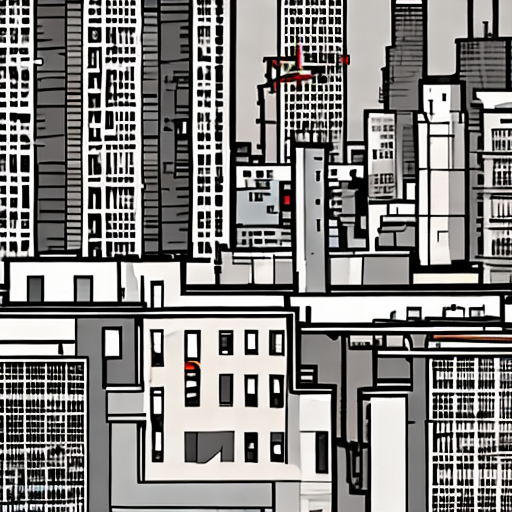

Images:  11%|█         | 1/9 [00:03<00:31,  3.91s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Akihama Village

An aerial photograph of a traditional Japanese rural village at the foot of the mountain range and the edge of the cyberpunk metropolis during dusk with ambient lighting using long exposure lens — at 16:9. vinkpunk

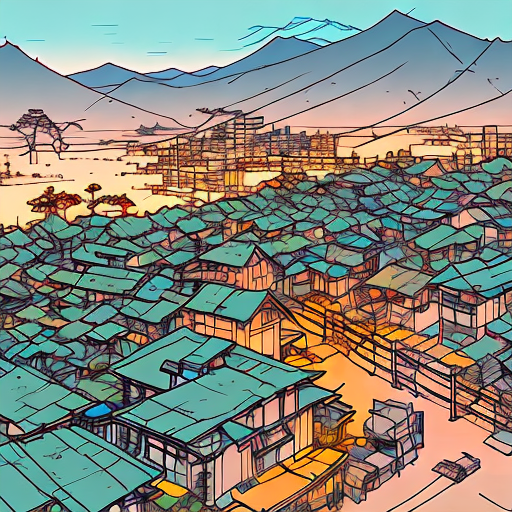

Images:  22%|██▏       | 2/9 [00:07<00:24,  3.45s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Lost Labyrinth


An aerial photograph of a rocky terrain teeming with labyrinthine tunnels during the day with natural light using a telephoto lens — at 16:9. vinkpunk

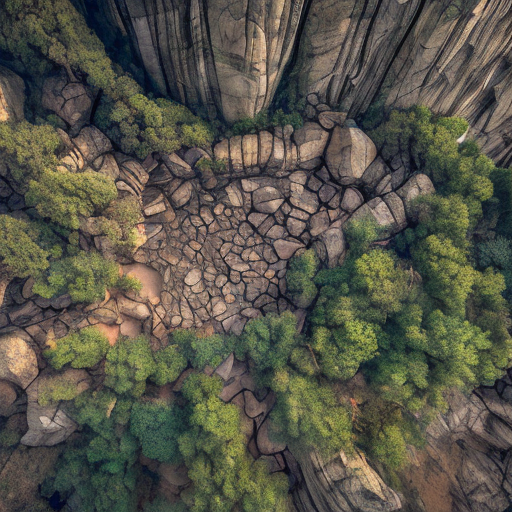

Images:  33%|███▎      | 3/9 [00:10<00:19,  3.25s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Noir City from 1930s


An aerial photograph of a bustling city with Speakeasy, Decker's Detective Agency, and City Hall during night time with low light using a telephoto lens — at 16:9. vinkpunk.

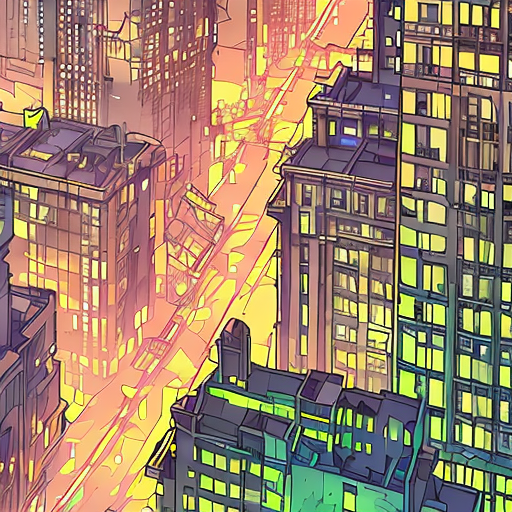

Images:  44%|████▍     | 4/9 [00:13<00:15,  3.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Spaceship Cruz

An aerial photograph of a deep space view with Command bridge, Observation deck, and Transporter room during midnight with low light using star field lens — at 16:9. vinkpunk

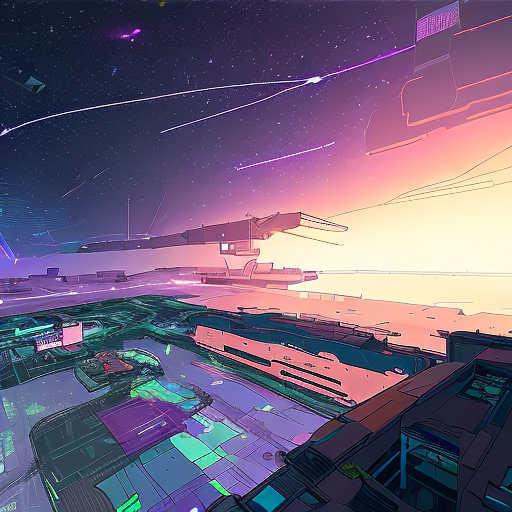

Images:  56%|█████▌    | 5/9 [00:16<00:12,  3.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Goblin Mines

An aerial photograph of a rocky terrain with Cave Entrance, Smelting Room, and Mines Entrance during dusk with low-key lighting using a telephoto lens — at 16:9. vinkpunk

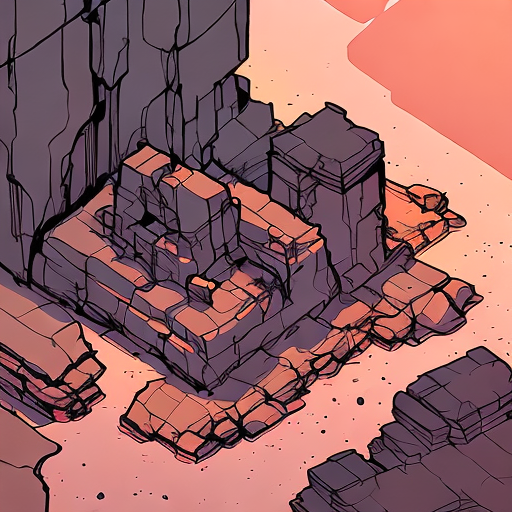

Images:  67%|██████▋   | 6/9 [00:19<00:09,  3.11s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### SuperMario Land Plain


An aerial photograph of a vibrant plain with Enchanted Castle and Magic Lake during sunrise with a telephoto lens — at 16:9. vinkpunk

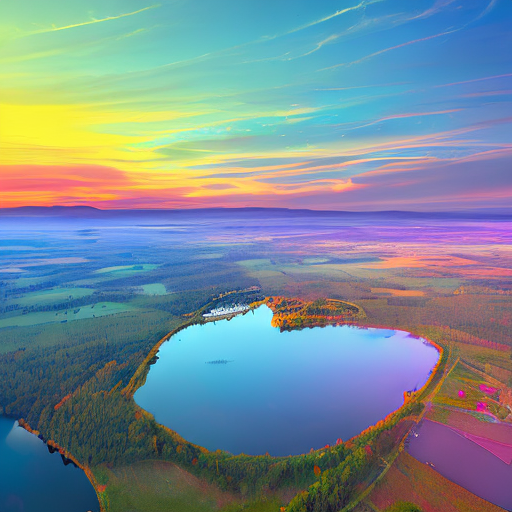

Images:  78%|███████▊  | 7/9 [00:22<00:06,  3.10s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Magical Beach Land


An aerial photograph of a beach with Old Castle, Mushroom Patch, and winding road during dusk with telephoto lens — at 16:9. vinkpunk

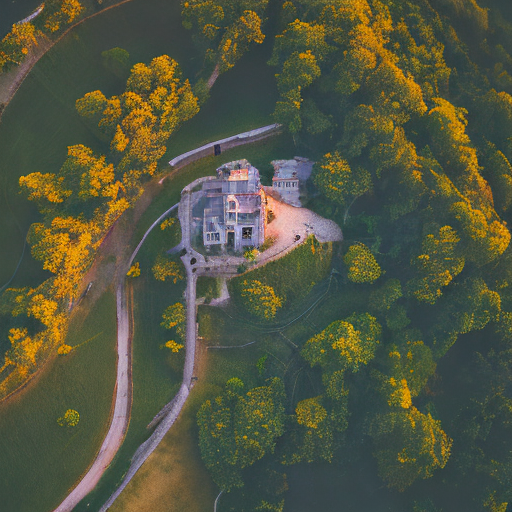

Images:  89%|████████▉ | 8/9 [00:25<00:03,  3.09s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Item f7zugy


The entire wallet is visible. Wallet full of coins, with coins of varying shapes, sizes, and metals spilling out onto a background of city streets, carts, and towering skyscrapers during nighttime with artificial lighting. vinkpunk

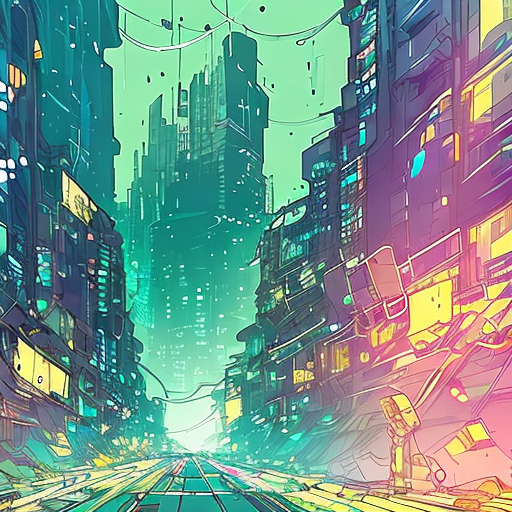

Images: 100%|██████████| 9/9 [00:28<00:00,  3.16s/it]


9

In [5]:
from holodeck.gpt_image import generate_image
from IPython.display import display, Markdown

img_prompts = locations_prompts + objects_image_prompts + buildings_image_prompts

# img_prompts = img_prompts[:9]

images = []

for obj, prompt in tqdm(img_prompts, desc="Images"):
    image = generate_image(prompt)
    display(Markdown(f"### {obj.name}"))
    display(Markdown(prompt))
    display(image)
    image_file_name = f".images/{obj.name}.jpg"
    image.save(image_file_name)
    images.append((obj, prompt, image_file_name))

len(images)


## Display Images

/tmp/ipykernel_10470/1138492781.py:36: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((new_width, new_height), Image.ANTIALIAS)


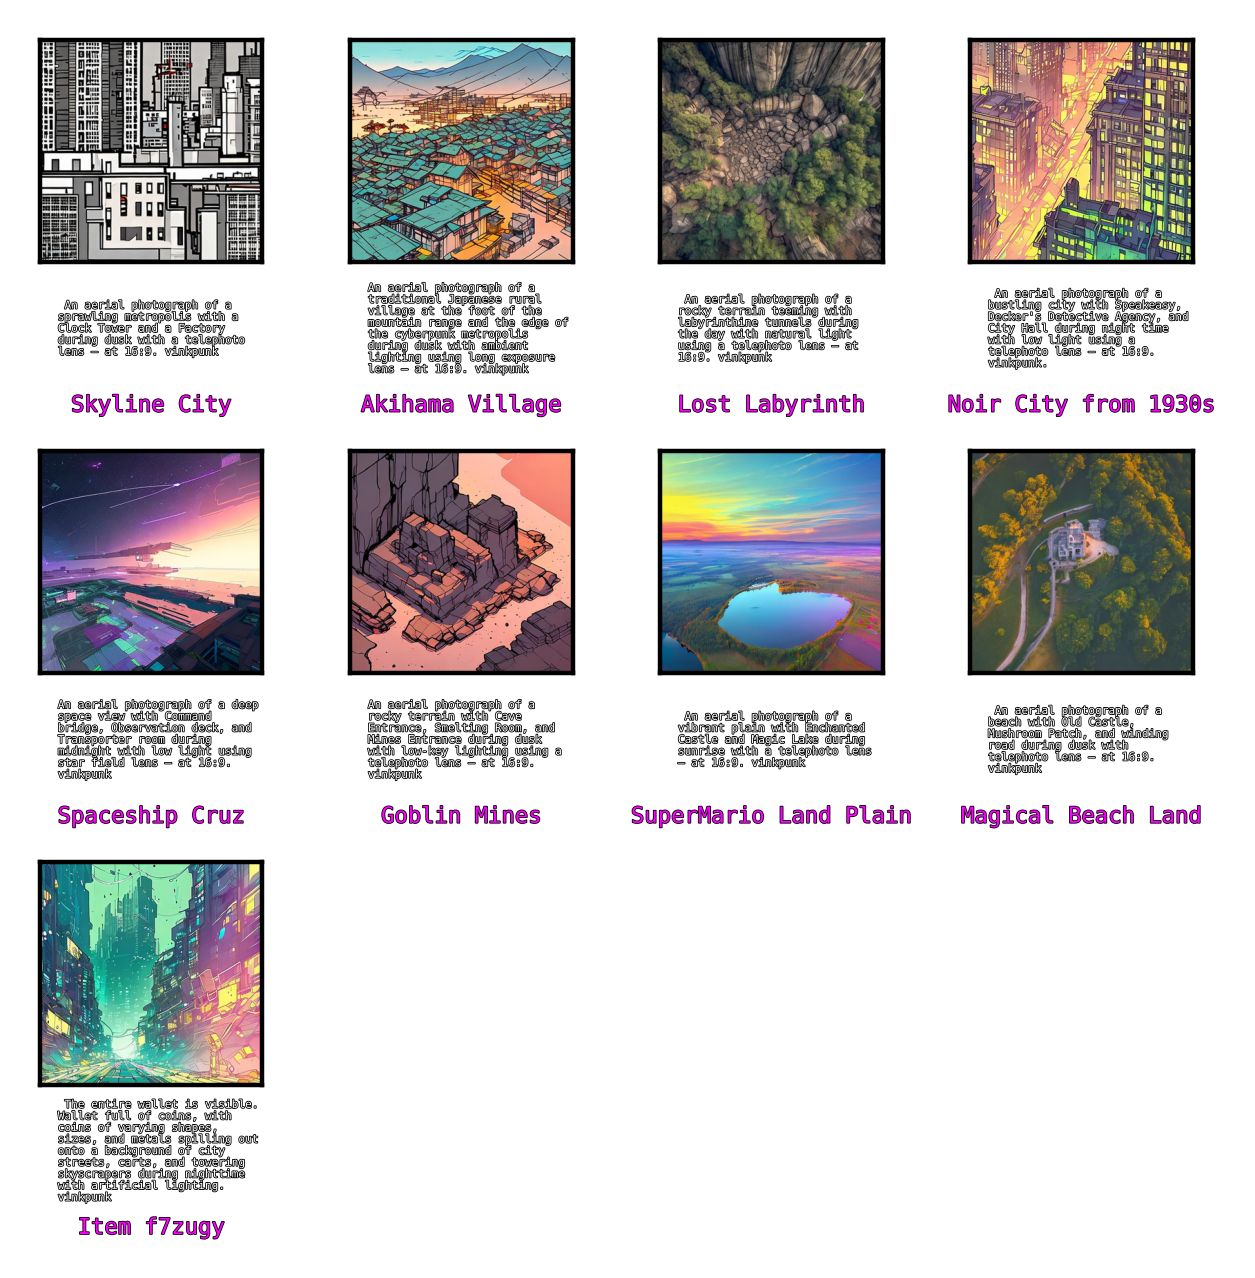

In [41]:
import textwrap
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

text_width = 30
dpi = 400.0
fig_width = 3.234

columns = 4
pic_width = fig_width * 0.25

# Estimate the number of rows needed based on the number of images
num_rows = (len(images) + columns - 1) // columns

# Get the height of the first image adjusted for scale
with Image.open(images[0][2]) as img:
    w, h = img.size
    aspect_ratio = float(w) / h
    fig_height = fig_width * aspect_ratio


fig = plt.figure(figsize=(fig_width, fig_height), dpi=dpi)

# Define the path effect for the outline
outline_effect = withStroke(linewidth=0.3, foreground='black')

# Loop over the images and create a subplot for each
for i, (obj, prompt, image_file_name) in enumerate(images):
    image = Image.open(image_file_name)
    
    # Resize the image
    w, h = image.size
    aspect_ratio = float(w) / h
    new_width = int(pic_width * dpi)
    new_height = int(new_width / aspect_ratio)
    image = image.resize((new_width, new_height), Image.ANTIALIAS)
    
    # Create a subplot for the image
    ax = fig.add_subplot(len(images) // columns + 1, columns, i + 1)
    
    # Display the image
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal') # set aspect ratio to 1:1
    
    # Set the title to the obj.name
    # ax.set_title(obj.name, fontsize=4, color='magenta', pad=-10)
    
    # Wrap the prompt text to the desired width
    wrapped_prompt = textwrap.fill(prompt, width=text_width)
    
    # Display the wrapped prompt text below the title with black outline
    ax.text(0.08, -0.3, wrapped_prompt, ha='left', va='center', transform=ax.transAxes, fontsize=2, family='monospace', color='white', path_effects=[outline_effect])
    
    ax.text(0.5, -0.6, obj.name, ha='center', va='top', transform=ax.transAxes, fontsize=4, family='monospace', color='magenta', path_effects=[outline_effect])

plt.subplots_adjust(wspace=0.01, hspace=0.01)

plt.tight_layout()

# Remove the half-transparent white overlay
fig.patch.set_facecolor('none')
